# Import libraries

In [1]:
!pip install bertopic[gensim]
from bertopic import BERTopic

     |████████████████████████████████| 57 kB 2.1 MB/s 
     |████████████████████████████████| 88 kB 5.0 MB/s 
     |████████████████████████████████| 5.2 MB 33.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 4.0 MB 35.6 MB/s 
     |████████████████████████████████| 1.2 MB 36.9 MB/s 
     |████████████████████████████████| 77 kB 6.2 MB/s 
     |████████████████████████████████| 6.6 MB 38.5 MB/s 
     |████████████████████████████████| 895 kB 43.1 MB/s 
     |████████████████████████████████| 636 kB 48.3 MB/s 
     |████████████████████████████████| 1.1 MB 41.6 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330830 sha256=aab5dcb8d8b273beee1016c2d35ea0f5539a05c8d20548827490c00ac1a18e37
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef

In [2]:
import pandas as pd
import numpy as np
import spacy

import re
import seaborn as sns 
from matplotlib import pyplot as plt

from sentence_transformers import SentenceTransformer
import umap
import hdbscan
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load and preprocess data

In [4]:
df = pd.read_csv("/content/drive/MyDrive/TFM/abstracts.csv", sep=";")
#Drop repo, keep only abstracts and label
abstracts = df.drop('Repo', axis=1)
print(abstracts.shape)
abstracts.head()

(25828, 2)


,Text,Label
0,"""https://paperswithcode.com/method/multiple-ra...",General
1,"""https://paperswithcode.com/method/dblock DBlo...",General
2,"""https://paperswithcode.com/method/gan-tts GAN...",Sequential
3,"""https://paperswithcode.com/method/conditional...",General
4,"""https://paperswithcode.com/method/gblock GBlo...",General


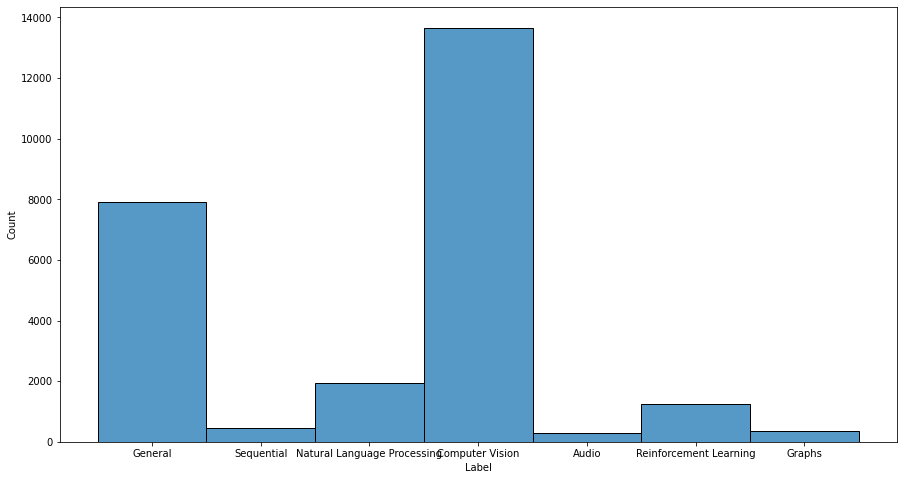

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(x='Label',data=abstracts)

In [5]:
def cleaner(text):
    """
    Preprocess the abstracts
    """
    #Remove links
    text = re.sub(r'https:\S+',' ',str(text))
    #Remove equations
    text = re.sub(r'(\$[^$]+\$)|(\$\$[^$]+\$\$)',' ',text)
    #Remove common abbreviations
    text = re.sub(r'i\.e\.|e\.g\.|etc.',' ',text)
    #Remove special characters
    text = re.sub(r'\W',' ',text)
    #Remove words with only one character
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    #Change text to lower case
    text = text.lower()
    return text

In [6]:
#Preprocess
docs = abstracts.Text.apply(cleaner)
result = pd.DataFrame(docs)

# BERT

BERTopic is a topic modeling technique that leverages BERT embeddings and c-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.

The default model in BERTopic ("all-MiniLM-L6-v2") works great for English documents. We set the default values for the umap function, but we set the random state for reproducibility purposes.

In [ ]:
#4 mins
umap_model = umap.UMAP(n_neighbors=15,
                       n_components=5,
                       min_dist=0.0,
                       metric='cosine',
                       low_memory= False, 
                       random_state = 123)

topic_model = BERTopic(umap_model=umap_model)
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic_info()

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


,Topic,Count,Name
0,-1,525,-1_mask_branch_yolov4_cnn
1,0,504,0_head_multi_dependencies_attention
2,1,500,1_recurrence_transformer_draw_dominant
3,2,489,2_encodings_absolute_positional_embeddings
4,3,487,3_wise_feed_forward_position
...,...,...,...
426,425,11,425_sk_kernel_selective_controls
427,426,11,426_offload_communication_zero_sharded
428,427,11,427_esp_espnet_hff_gridding
429,428,11,428_bisenet_bilateral_guided_stdc


# Less memory

Set the minimum frequency of words in the CountVectorizer class to reduce the size of the resulting sparse c-TF-IDF matrix and significantly reduce memory

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#3 min
#min_df = minimum frequency of words
umap_model = umap.UMAP(n_neighbors=15,
                       n_components=5,
                       min_dist=0.0,
                       metric='cosine',
                       low_memory= False, 
                       random_state = 3400)

vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words="english", min_df=5)
topic_model_2 = BERTopic(vectorizer_model=vectorizer_model,
                         umap_model=umap_model)#si sigue tardando set calculate_probabilities=False
topics, probs = topic_model_2.fit_transform(docs)
topic_model_2.get_topic_info()


,Topic,Count,Name
0,-1,587,-1_inception_standard deviation_modulation_con...
1,0,512,0_multi head attention_head attention_multi he...
2,1,507,1_transformer transformer_recurrence_encoder d...
3,2,490,2_encodings_position encodings_absolute_positi...
4,3,488,3_feed forward_wise_feed_forward
...,...,...,...
434,436,11,436_non parametric_parametric_self supervision...
433,437,11,437_balanced_localization_dynamic_regression
431,439,11,439_dueling network_dueling_streams_action
430,435,11,435_flows_normalizing_invertible_transforming


# Less topics

First, we can set the min_topic_size in the BERTopic initialization much higher (e.g., 300) to make sure that those small clusters will not be generated. This is a HDBSCAN parameter that specifies what the minimum number of documents are needed in a cluster. More documents in a cluster means less topics will be generated.

In [ ]:
#3 min
umap_model = umap.UMAP(n_neighbors=15,
                       n_components=5,
                       min_dist=0.0,
                       metric='cosine',
                       low_memory= False, 
                       random_state = 2750)

vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words="english", min_df=5)
topic_model_3 = BERTopic(vectorizer_model=vectorizer_model,
                         umap_model=umap_model,
                         calculate_probabilities = False,
                         min_topic_size = 300 #avoid small clusters
                         )#si sigue dando muchos topics cambiar n_neighbors = 100,
                        #por default es 15
topics, probs = topic_model_3.fit_transform(docs)
topic_model_3.get_topic_info()

,Topic,Count,Name
0,-1,15126,-1_network_2000_loss_model
1,0,2807,0_feature_normalization_batch_attention
2,1,683,1_image_translation_loss_adversarial
3,2,607,2_position_wise_feed forward_feed
4,3,586,3_attention_multi head_multi head attention_he...
5,4,525,4_transformer_encoder decoder_decoder_encoder
6,5,491,5_position_embeddings_dimension_positions
7,6,487,6_product_scaled_variance_attention
8,7,483,7_path_net_consists_convolution
9,8,482,8_pre_bert_pre training_masked


Second, you can create a custom UMAP model and set n_neighbors much higher than the default 15 (e.g., 200). This also prevents those micro clusters to be generated as it will needs quite a number of neighboring documents to create a cluster.

In [ ]:
#10 min
vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words="english", min_df=5)

umap_model = umap.UMAP(n_neighbors=100,
                       n_components=5,
                       min_dist=0.0,
                       metric='cosine',
                       low_memory= False, 
                       random_state = 100)

topic_model_4 = BERTopic(vectorizer_model=vectorizer_model,
                         umap_model=umap_model,
                         calculate_probabilities = False,
                         min_topic_size = 300 #avoid small clusters
                        )

topics, probs = topic_model_4.fit_transform(docs)
topic_model_4.get_topic_info()

,Topic,Count,Name
0,-1,10755,-1_network_image_2000_loss
1,0,5206,0_2000_attention_spatial_feature
2,1,584,1_pre_training_fine_model
3,2,555,2_inception_v2_resnet_region
4,3,503,3_attention_head_multi_dependencies
5,4,500,4_transformer_encoder decoder_decoder_encoder
6,5,490,5_position_embeddings_dimension_summed
7,6,489,6_wise_position_feed forward_feed
8,7,488,7_scaled_variance_attention_mean
9,8,480,8_bottleneck_residual block_residual_block


Third, we can set nr_topics to a value that seems logical to the user. Do note that topics are forced to merge together which might result in a lower quality of topics. In practice, I would advise using nr_topic="auto" as that will merge topics together that are very similar. Dissimilar topics will therefore remain separated.

In [ ]:
vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words="english", min_df=5)

umap_model = umap.UMAP(n_neighbors=100,
                       n_components=5,
                       min_dist=0.0,
                       metric='cosine',
                       low_memory= False, 
                       random_state = 7000)

topic_model_5 = BERTopic(vectorizer_model=vectorizer_model,
                         umap_model=umap_model,
                         calculate_probabilities = False,
                         min_topic_size = 300,#avoid small clusters
                         nr_topics="auto" #reduce number topics automatically
                        )#si sigue dando muchos topics cambiar n_neighbors = 100,
                        #por default es 15
topics, probs = topic_model_5.fit_transform(docs)
topic_model_5.get_topic_info()

,Topic,Count,Name
0,-1,11016,-1_loss_network__object
1,0,7434,0_feature__convolution_convolutional
2,1,1462,1_mapping_residual_functions_nonlinear
3,2,584,2_pre_training_model_trained
4,3,551,3_resnet_module_image_architecture
5,4,503,4_attention_head_multi_attention mechanism
6,5,500,5_transformer_encoder decoder_decoder_encoder
7,6,490,6_position_embeddings_dimension_function
8,7,488,7_wise_position_feed forward_feed
9,8,488,8_product_variance_attention_mean


In [ ]:
topic_model_5.visualize_barchart()

In [ ]:
topic_model_5.visualize_topics()

In [ ]:
topic_model_5.visualize_heatmap()

In [ ]:
topics_per_class = topic_model_5.topics_per_class(docs, topics, classes=abstracts['Label'])

In [ ]:
topic_model_5.visualize_topics_per_class(topics_per_class,topics=range(0,15))

Computer vision 0,1,9 \\
Audio 0 \\
Graphs 0 \\
General 0,4,6,7,8 \\
Reinforcement learning 11,13 \\
NLP 0,2,5 \\
Sequential 0

# Sentence Transformers

In [10]:
#9 mins
vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words="english", min_df=5)

umap_model = umap.UMAP(n_neighbors=15,
                       n_components=5,
                       min_dist=0.0,
                       metric='cosine',
                       low_memory= False, 
                       random_state = 9800)

sentence_model = SentenceTransformer("all-mpnet-base-v2")

topic_model_6 = BERTopic(vectorizer_model=vectorizer_model,
                         embedding_model=sentence_model,
                         umap_model=umap_model,
                         calculate_probabilities = False,
                         min_topic_size = 300,#avoid small clusters
                         nr_topics="auto" #reduce number topics automatically
                        )

topics, probs = topic_model_6.fit_transform(docs)
topic_model_6.get_topic_info()

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

,Topic,Count,Name
0,-1,16910,-1_network__loss_image
1,0,2103,0_use__network_backbone
2,1,1490,1_mapping_residual_layers_blocks
3,2,549,2_position_embeddings_dimension_allow
4,3,545,3_pre_language_training_fine
5,4,542,4_transformer_encoder decoder_decoder_encoder
6,5,536,5_wise_position_feed forward_feed
7,6,492,6_attention_head_multi_dependencies
8,7,487,7_dot_dot product_product_scaled
9,8,429,8_followed_consists_convolution_feature


In [12]:
topics_per_class = topic_model_6.topics_per_class(docs, topics, classes=abstracts['Label'])
topic_model_6.visualize_topics_per_class(topics_per_class,topics=range(0,14))

In [8]:
#8 mins
vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words="english", min_df=5)

umap_model = umap.UMAP(n_neighbors=15,
                       n_components=5,
                       min_dist=0.0,
                       metric='cosine',
                       low_memory= False, 
                       random_state = 9800)

sentence_model = SentenceTransformer("allenai-specter")

topic_model_7 = BERTopic(vectorizer_model=vectorizer_model,
                         embedding_model=sentence_model,
                         #umap_model=umap_model,
                         calculate_probabilities = False,
                         min_topic_size = 300,#avoid small clusters
                         nr_topics="auto" #reduce number topics automatically
                        )

topics, probs = topic_model_7.fit_transform(docs)
topic_model_7.get_topic_info()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


,Topic,Count,Name
0,-1,15372,-1_2000_network_image_loss
1,0,2263,0_graph_2000_learning_networks
2,1,642,1_pre_bert_language model_training
3,2,563,2_position_positional_embeddings_dimension
4,3,531,3_transformer_encoder decoder_decoder_encoder
5,4,524,4_attention_multi head_head attention_multi he...
6,5,497,5_dot_dot product_product_scaled
7,6,493,6_wise_position_feed forward_feed
8,7,460,7_path_net_followed_convolution
9,8,443,8_bottleneck_residual block_residual_block


In [9]:
topics_per_class = topic_model_7.topics_per_class(docs, topics, classes=abstracts['Label'])
topic_model_7.visualize_topics_per_class(topics_per_class,top_n_topics=21)

Computer vision  \\
Audio 1,0 \\
Graphs 0,2 \\
General  \\
Reinforcement learning 3,0 \\
NLP  3,1,0 \\
Sequential 1,0